## Variation of particulate matter during the Black Summer period

Dataset collected from Victoria Environmental Protection Agency data.

In [1]:
library(pivottabler)

aq.df <- read.csv('./data/naqd/observations_062019_052020.csv')

sites <- unique(aq.df$site_name)
polls <- c('pm2p5', 'pm10')
aq.df$day <- substr(aq.df$time_stamp, 3, 10)
aq.df[is.na(aq.df)] <- 0
days <- unique(aq.df$day)


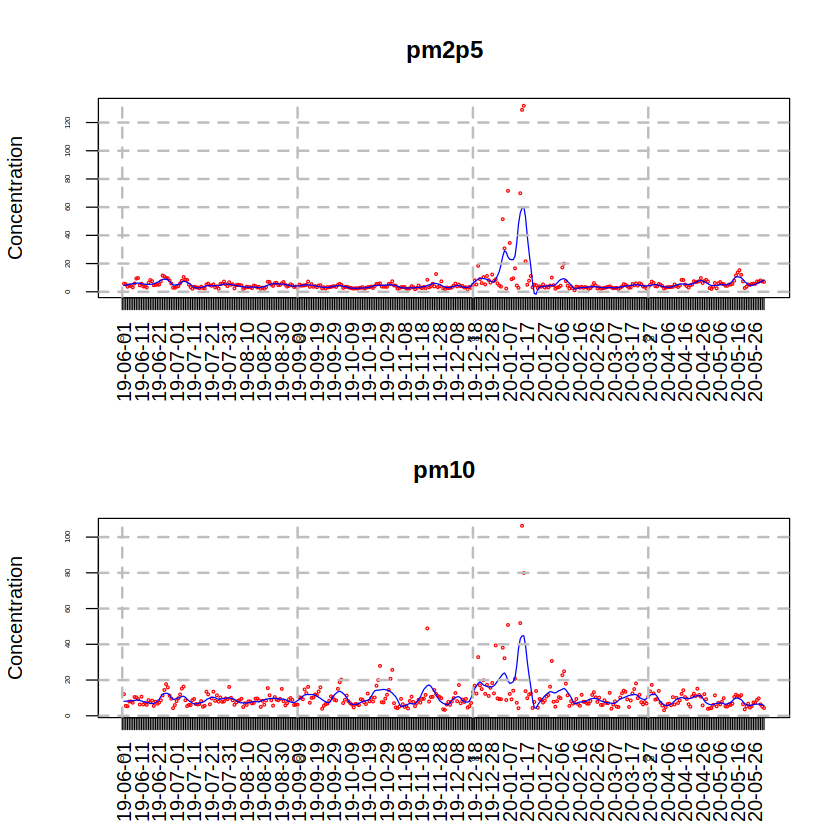

In [2]:
tsByStation <- function (x, pollname) {
  #site.df <- subset(x, site_name == sitename)
  aggr <- aggregate(x[[pollname]], list(x$day), FUN=mean)
  xvalues <- seq_along(aggr$Group.1)  
  plot(xvalues, aggr$x, main=pollname, cex=0.3, col='red',
       cex.axis=0.4,
       ylab='Concentration', xlab='')
  lines(predict(loess(x ~ xvalues, data=aggr, span=0.05)), x=xvalues, col='blue')
  axis(1, at=xvalues, labels=aggr$Group.1, las=2)
  grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 2)
}

par(mfrow=c(2, 1))
tsByStation(aq.df, polls[1])
tsByStation(aq.df, polls[2])
